In [ ]:
import random as rand
import sys
import copy
import matplotlib.pyplot as plt
import numpy as np

global CNT
global WAR
CNT = 0
WAR = 0

class Deck:
    def __init__(self):
        self.cards = []

    def draw_card(self) -> int:
        temp = 0
        try:
            temp = self.cards.pop(0)
        except IndexError:
            pass
        return temp
    
    def add_cards(self, cards : list) -> None:
        while cards:
            idx = rand.randint(0, len(cards) - 1)
            self.cards.append(cards.pop(idx))

    def get_num_cards(self):
        return len(self.cards)

def play_round(player_1 : Deck, player_2 : Deck, table : list = []):  
    p1 = player_1.draw_card()
    p2 = player_2.draw_card()
    if p1 == 0:
        player_2.add_cards([p2])
        if table:
            player_2.add_cards(table)
        return game_end(2)

    elif p2 == 0:
        player_1.add_cards([p1])
        if table:
            player_1.add_cards(table)
        return game_end(1)
    table.append(p1)
    table.append(p2)
    # print(table)
    res = p1 - p2
    if res < 0:
        player_2.add_cards(table)
        # print("Player 2 wins the round")
    elif res == 0:
        global WAR
        WAR += 1
        num_p1 = player_1.get_num_cards()
        num_p2 = player_2.get_num_cards()
        if num_p1 < 2:
            return game_end(1)     
        elif num_p2 < 2:
            return game_end(2)
        else:
            war_card_1 = player_1.draw_card()
            war_card_2 = player_2.draw_card()
            table.append(war_card_1)
            table.append(war_card_2)
            play_round(player_1, player_2, table)

    else:
        player_1.add_cards(table)
    global CNT
    CNT += 1
    return 0, 0 

def game_end(player : int) -> None:
    # print("Player {player} wins".format(player = player))
    # print("Rounds: {rounds}".format(rounds = CNT))
    # print("Wars: {wars}".format(wars = WAR))
    return CNT, WAR

def shuffle_cards(player_1 : Deck, player_2 : Deck, deck : list):
    if len(deck) % 2 != 0:
        print("Nieparzysta liczba kard, wydupcaj!")
        sys.exit()
    deck_cpy = copy.deepcopy(deck)
    while deck:
        idx = rand.randint(0, len(deck) - 1)
        player_1.add_cards([deck.pop(idx)])
        idx2 = rand.randint(0, len(deck) - 1)
        player_2.add_cards([deck.pop(idx2)])
    return deck_cpy

def play_game(p1, p2):
    rounds = 0
    wars = 0
    while not rounds and not wars:
        rounds, wars = play_round(p1, p2, [])
        # TODO
        # Check card leak situation to makes sure everything
        # works correcly.
        # leak = len(p1.cards) + len(p2.cards)
        # if leak != 4 * 13:
        #     print("Cards leaked")
        #     print("Player_1 deck: {}".format(p1.cards))
        #     print("Player_2 deck: {}".format(p2.cards))    
        #     break
    return rounds, wars   
         
def simplify_data(keys : list, values : list):
    pop_lst = []
    for i in range(0, len(values)-1):
        if values[i] < 15:
            values[i+1] += values[i]
            pop_lst.append(i)
    pop_lst.reverse()
    for i in pop_lst:
        values.pop(i)
        keys.pop(i)
    return keys, values

def bar_x_axis(ranges : list) -> list:
    lst = []
    for i in range(1, len(ranges)):
        lst.append("{low}-{high}".format(low=ranges[i-1], high=ranges[i]))
    lst.append("{max}+".format(max=ranges[-1]))
    return lst

def bar_plot(data : list, span = 100):
    data.sort()
    bar_data = {}
    for rng in range(span, data[-1]+span, span):
        sorted = sum(list(bar_data.values()))
        data_set = [val for val in data if val < rng]
        bar_data[rng] = len(data_set) - sorted

    x_axis = list(bar_data.keys())
    x_axis = [val - span for val in x_axis]
    y_axis = list(bar_data.values())
    x_axis, y_axis = simplify_data(x_axis, y_axis)
    x_axis = bar_x_axis(x_axis)
    plt.figure(figsize=(26, 13))
    plt.bar(x_axis, y_axis, width=0.8)
    plt.xlabel("Rounds played")
    plt.ylabel("Number of games")
    plt.xticks(rotation=45,ha="right")
    plt.title("War game statictics")
    plt.show()

In [55]:
deck = [2,2,2,2,
        3,3,3,3,
        4,4,4,4,
        5,5,5,5,
        6,6,6,6,
        7,7,7,7,
        8,8,8,8,
        9,9,9,9,
        10,10,10,10,
        11,11,11,11,
        12,12,12,12,
        13,13,13,13,
        14,14,14,14]

rounds = []
wars = []
for i in range(1000):
   CNT = 0
   WAR = 0
   p1 = Deck()
   p2 = Deck()
   deck = shuffle_cards(p1, p2, deck)
   one_rd, one_wr = play_game(p1, p2) 
   rounds.append(one_rd)
   wars.append(one_wr)

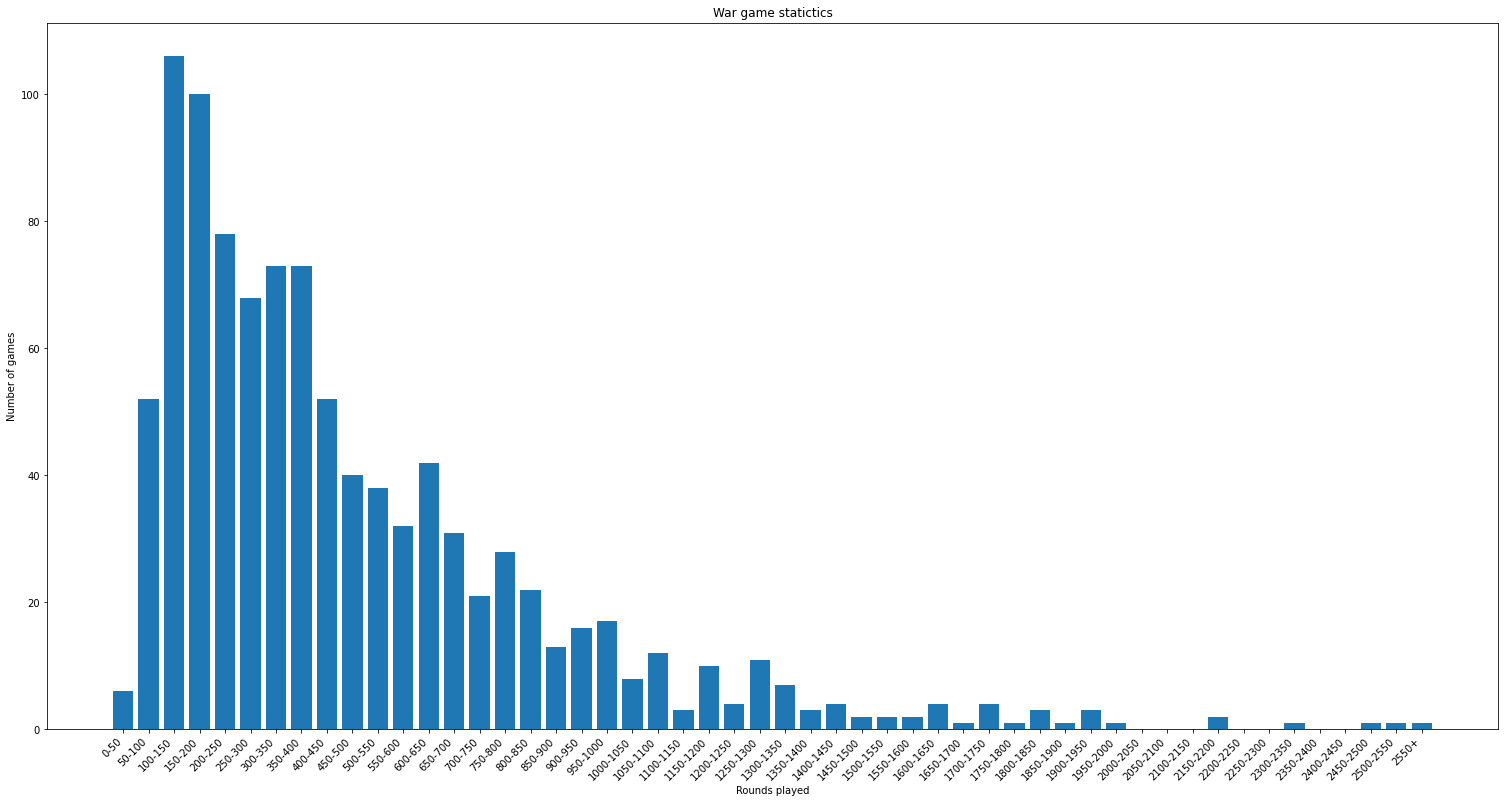

Average number of rounds : 475.823
Median of rounds played: 357.5
Average number of wars: 28.097
Median of wars: 20.0
[41, 41, 42, 46, 46, 49, 50, 51, 52, 52, 54, 57, 64, 67, 68, 69, 69, 71, 73, 73, 74, 75, 75, 76, 76, 76, 77, 78, 78, 79, 79, 80, 81, 82, 83, 84, 85, 85, 86, 87, 88, 88, 90, 91, 92, 92, 92, 93, 93, 93, 94, 94, 95, 97, 98, 99, 99, 99, 100, 100, 100, 101, 101, 101, 102, 102, 102, 102, 104, 105, 105, 106, 107, 107, 108, 109, 109, 109, 110, 110, 111, 112, 113, 113, 114, 114, 114, 114, 114, 115, 115, 117, 117, 118, 118, 120, 120, 121, 121, 122, 122, 123, 123, 124, 124, 125, 125, 126, 126, 128, 128, 128, 129, 129, 129, 129, 130, 130, 130, 131, 131, 132, 132, 132, 133, 133, 134, 134, 134, 135, 136, 136, 136, 137, 137, 137, 137, 137, 138, 138, 138, 138, 139, 139, 139, 140, 140, 140, 141, 142, 142, 143, 143, 143, 143, 144, 146, 146, 146, 148, 148, 148, 149, 149, 150, 151, 152, 152, 153, 153, 153, 153, 154, 155, 156, 156, 157, 158, 158, 158, 158, 159, 159, 160, 160, 160, 161, 162,

In [ ]:

bar_plot(rounds, 50)
print("Average number of rounds : {}".format(np.mean(rounds)))
print("Median of rounds played: {}".format(np.median(rounds)))
print("Average number of wars: {}".format(np.mean(wars)))
print("Median of wars: {}".format(np.median(wars)))
